# Introduction

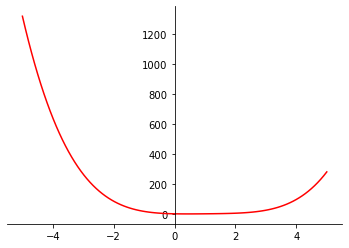

In [1]:
#introduction general function plotting
# Plot the function (x - 1)**4 + x**2
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5,5,100)

y =(x - 1)**4 + x**2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()



In [2]:
# Write a simple dichotomous algorithm (bisection method) to find the zero of a function.
f_initial = lambda x : (x - 1)**4 + x**2
f =lambda x : 4*(x - 1)**3 + 2*x

def find_root(f, a, b):
    if (f(a)*f(b) >=0):
        print("You have not assumed right a and b\n") 
        return

    t = (a+b)/2
    if f(t) == 0.0:
        return t
    else:
        while (abs(f(t))>0.001):
            t = (a+b)/2
            if (f(t)==0.0):
                return t
#             print(f(t))
            if (f(t)*f(b)<0):
                a = t
            elif (f(t)*f(a)<0):
                b = t
    return t
    
root = find_root(f,-200,300)
print('x_min: %.02f, f(x_min): %.02f' % (root, f_initial(root)))

x_min: 0.41, f(x_min): 0.29


Brent's method for optimization x_min: 0.41, f(x_min): 0.29


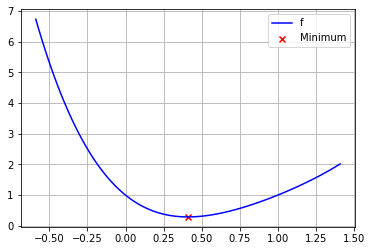

In [3]:
#Brent's method for optimization
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar

f = lambda x : (x - 1)**4 + x**2
res = minimize_scalar(f, method='brent')
print("Brent's method for optimization x_min: %.02f, f(x_min): %.02f" % (res.x, res.fun))

# plot curve
x = np.linspace(res.x - 1, res.x + 1, 100)
y = [f(val) for val in x]
plt.plot(x, y, color='blue', label='f')

# plot optima
plt.scatter(res.x, res.fun, color='red', marker='x', label='Minimum')

plt.grid()
plt.legend(loc = 1)

# Gradient Descent Methods

→ How does the learning rate influence the efficiency of the algorithm? What happens if it is very small? What if it is very big?

when the learning rate is too low, it takes a lot of steps to converge. On the other hand, when the learning rate is too high, Gradient Descent fails to reach the minimum. 

In [4]:
#Write a simple gradient descent function which finds the minimum of a function f
# Similarly, we will stop our search with a precision of 0.001.

def gradient_descent(f, f_prime, start, learning_rate):
    current_x = start
    while (abs(f_prime(current_x))>0.001):
        new_x = current_x - learning_rate*f_prime(current_x)
        current_x = new_x
#         print(current_x)
    return current_x


f = lambda x : (x - 1) ** 4 + x ** 2
f_prime = lambda x : 4*((x-1)**3) + 2*x
start = -1
x_min = gradient_descent(f, f_prime, start, 0.01)
# print(x_min)
f_min = f(x_min)

print("gradient descent function xmin: %0.2f, f(x_min): %0.2f" % (x_min, f_min))


gradient descent function xmin: 0.41, f(x_min): 0.29


# To go further -> Simplex algorithm

In [5]:
# → Initialize A, b, and c as numpy arrays

# maximize   z = x + 2y
# subject to
#       • 2x + y ≤ 10
#       • -4x + 5y ≤ 8
#       • x - 2y ≤ 3
#       • x, y ≥ 0
import numpy as np

A = np.array([[2,1],[-4,5],[1,-2]]) 
b = np.array([10,8,3]) 
c = np.array([-1,-2]) 
from scipy.optimize import linprog

def solve_linear_problem(A, b, c):
   
    res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None))
#     print(res)
    return res.fun, res.x

optimal_value, optimal_arg = solve_linear_problem(A, b, c)

print("Simplex algorithm: The optimal value is: ", optimal_value, " and is reached for x = ", optimal_arg)






Simplex algorithm: The optimal value is:  -10.999999996814655  and is reached for x =  [3. 4.]


solution is located on the edge of the polytope 
because simplex algorithm does not compute the value of the optimal value at every point,
it begins with corner point of feasibility region where x,y = 0 then moves to other corner point
and ends when the optimum value is found.
